# Exemplo prático de PCA (Principal Component Analysis)
## Inicialmente, vamos gerar alguns dados.
Criamos uma matrix com 400 pontos em 4D e inicializamos cada dimensão com um valor diferente
1. i
2. log(i)
3. Valor randômico
8. log(i*1,5)

In [1]:
% Cria matrix 400x4 e inicializa com 1's
M = ones(400, 4);
for i = 1:400
    M(i,1) = i;
    M(i,2) = log(i);
    M(i,3) = rand()*100;
    M(i,4) = log(i*1.5);
endfor

## Inspeção das 5 primeiras linhas e 5 últimas linhas

In [2]:
M(1:5,:)
M(396:400,:)

ans =

    1.00000    0.00000   62.16763    0.40547
    2.00000    0.69315   47.69616    1.09861
    3.00000    1.09861   98.08697    1.50408
    4.00000    1.38629   24.41983    1.79176
    5.00000    1.60944   99.60560    2.01490

ans =

   396.0000     5.9814    18.2218     6.3869
   397.0000     5.9839    36.3544     6.3894
   398.0000     5.9865    23.8167     6.3919
   399.0000     5.9890    22.0020     6.3944
   400.0000     5.9915    96.8415     6.3969



## Visualizando os dados
Como temos 4 dimensões, vamos criar um gráfico de dispersão (scatter plot) em 3 dimensões e codificar a 4ª dimensão com cor.
<a id='graf1'></a>

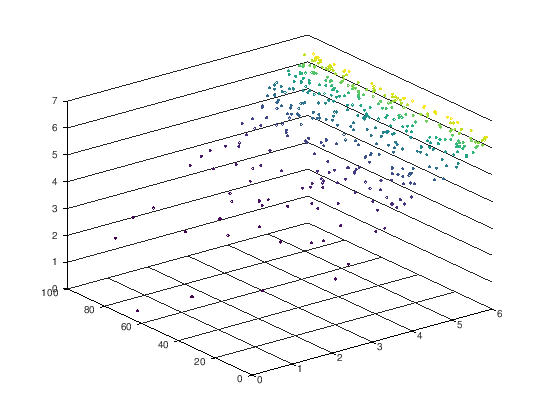

In [3]:
%plot -f png
% Como a primeira dimensão (M(:,1)) é formada pelos inteiros de 1 a 400, vamos codificá-la com cor.
scatter3(M(:,2), M(:,3), M(:,4), [], M(:,1))

# Examinando as dimensões 1x1
## Para entender melhor as relações entre as dimensões podemos gerar uma série de gráficos de dispersão
Assim poderemos ter uma ideia mais clara de como cada dimensão se relaciona com as outras

Os gráficos a seguir relacionam as dimensões 1x2, 1x3, 1x4, 2x3, 2x4, 3x4

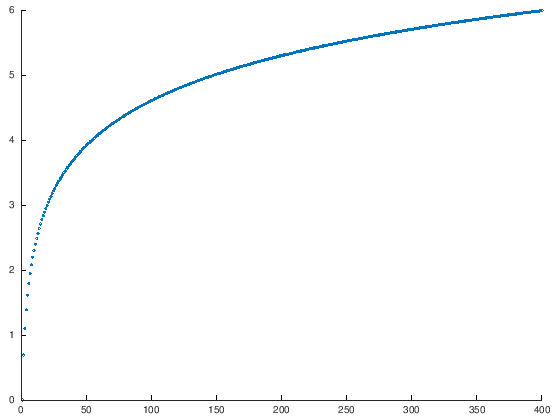

In [4]:
scatter(M(:,1), M(:,2))

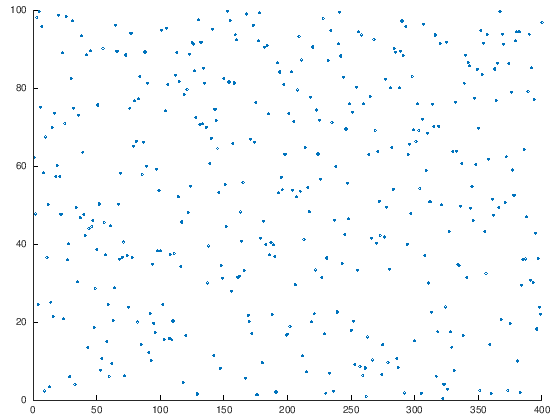

In [5]:
scatter(M(:,1), M(:,3))

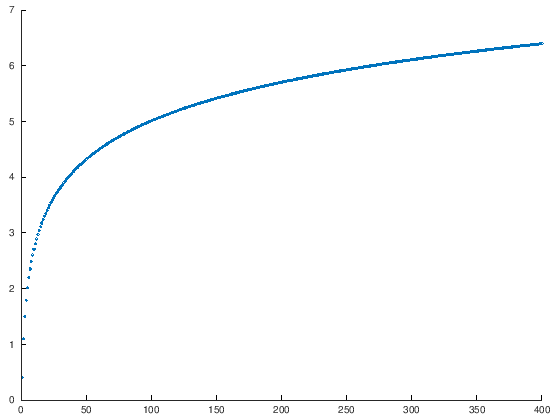

In [6]:
scatter(M(:,1), M(:,4))

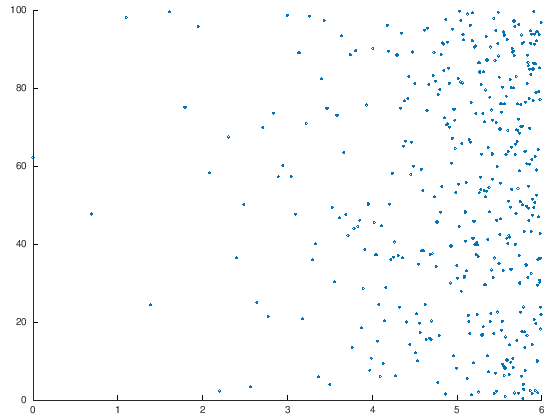

In [7]:
scatter(M(:,2), M(:,3))

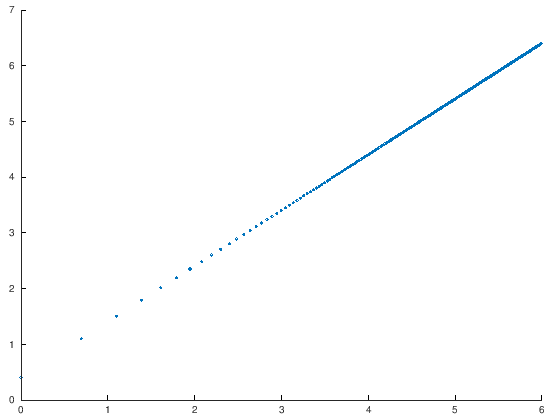

In [8]:
scatter(M(:,2), M(:,4))

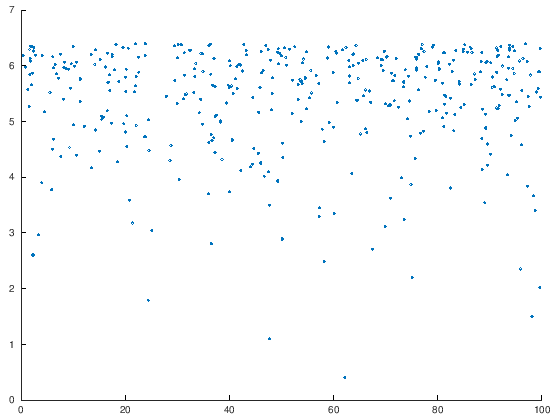

In [9]:
scatter(M(:,3), M(:,4))

## Outra forma de visualizar as relações entre as dimensões
Alternativamente (ou de forma complementar!) podemos visualizar as dimensões 3 a 3 (em vez de 1x1)

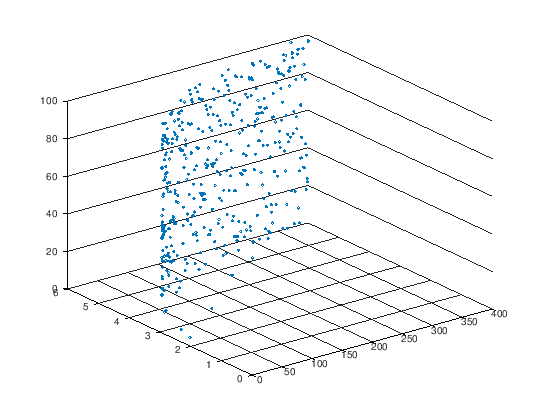

In [10]:
scatter3 (M(:,1), M(:,2), M(:,3))

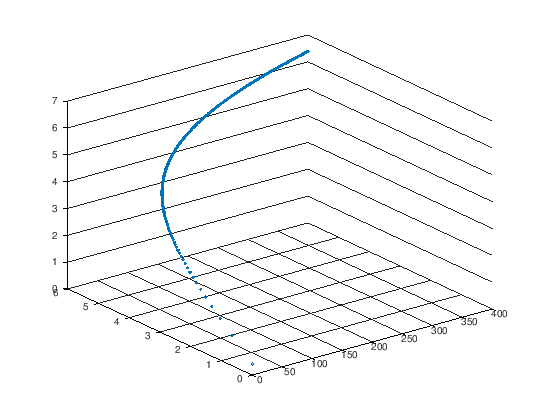

In [11]:
scatter3 (M(:,1), M(:,2), M(:,4))

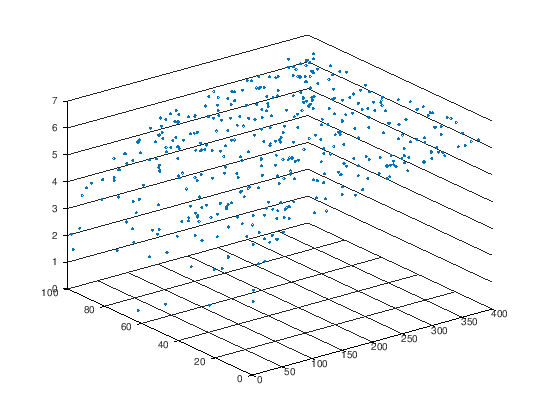

In [12]:
scatter3 (M(:,1), M(:,3), M(:,4))

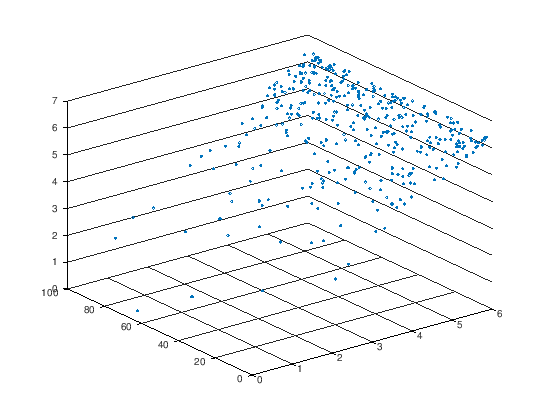

In [13]:
scatter3 (M(:,2), M(:,3), M(:,4))

## Normalizando os dados

Antes de aplicar o PCA, vamos normalizar os dados. Para normalizar uma matriz $M$ subtraímos a média e dividimos pelo desvio padrão, como indicado na equação abaixo:

$\frac{M - \bar M}{s}$

A seguir, inspecionamos as cinco primeiras linhas e as cinco últimas

In [14]:
M = (M - mean(M))./std(M);
M(1:5,:)
M(396:400,:)

ans =

  -1.72557  -5.14630   0.30568  -5.14630
  -1.71692  -4.43305  -0.18507  -4.43305
  -1.70827  -4.01583   1.52378  -4.01583
  -1.69962  -3.71980  -0.97441  -3.71980
  -1.69097  -3.49019   1.57528  -3.49019

ans =

   1.69097   1.00859  -1.18460   1.00859
   1.69962   1.01119  -0.56969   1.01119
   1.70827   1.01377  -0.99487   1.01377
   1.71692   1.01636  -1.05641   1.01636
   1.72557   1.01893   1.48154   1.01893



# Visualizando os dados normalizados
Antes de prosseguir, visualizamos os dados normalizados. Veja que o resultado visual é similar ao nosso [primeiro gráfico](#graf1), mas os eixos não são mais os mesmos.
<a id='grafNorm'></a>

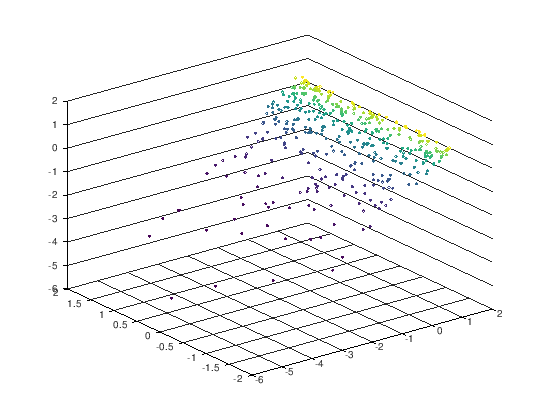

In [15]:
scatter3(M(:,2), M(:,3), M(:,4), [], M(:,1))

## Computar a matriz de covariância

Para prosseguirmos com o PCA temos que computar a matriz de covariância $\Sigma$ pela equação a seguir

$\Sigma = \frac{M^{T}M}{(sampleSize - 1)}$

Perceba que como $M$ tem dimensão $400x5$, $\Sigma$ deve ser $5x5$

In [16]:
sigma = (M'*M)/(size(M, 1)-1)

sigma =

   1.0000000   0.8792307   0.0156288   0.8792307
   0.8792307   1.0000000  -0.0010863   1.0000000
   0.0156288  -0.0010863   1.0000000  -0.0010863
   0.8792307   1.0000000  -0.0010863   1.0000000



## Singular Value Decomposition (SVG)
#### Ao aplicar a SVD à matriz de covariância, obtemos um conjunto de autovetores unitários e seus autovalores
* $U$ é a matriz de autovetores
* $S$ é a matriz diagonal de autovalores, ordenada pela escala dos autovetores. Veja que $S[1,1]\geq S[2,2]\geq S[3,3]\geq S[4,4]$

A matriz $V$ não é necessária para o passos seguintes do PCA, mas é retornada pela função [SVG](https://octave.sourceforge.io/octave/function/svd.html)

In [17]:
[U, S, V] = svd(sigma)

U =

  -5.5989e-01   1.1339e-02   8.2849e-01  -2.5814e-16
  -5.8588e-01  -8.8852e-03  -3.9581e-01  -7.0711e-01
  -4.0634e-03   9.9986e-01  -1.6430e-02  -3.7344e-18
  -5.8588e-01  -8.8852e-03  -3.9581e-01   7.0711e-01

S =

Diagonal Matrix

   2.8402e+00            0            0            0
            0   1.0002e+00            0            0
            0            0   1.5959e-01            0
            0            0            0   2.4082e-18

V =

  -0.55989   0.01134   0.82849   0.00000
  -0.58588  -0.00889  -0.39581  -0.70711
  -0.00406   0.99986  -0.01643  -0.00000
  -0.58588  -0.00889  -0.39581   0.70711



## Convertendo as 4 dimensões
Embora o PCA seja normalmente utilizado para redução de dimensionalidade, é possível converter TODAS as dimensões (ou quantas quisermos, de acordo com algum critério de corte) para o novo espaço vetorial.

É importante perceber que as novas dimensões não tem o mesmo formato dos dados originais, já que os dados foram transformados (transladadaos, comprimidos e rotacionados).

A conversão é feita pela equação abaixo:
* $PCA = M\times U$

Como $M$ é $400x4$ e $U$ é $4x4$, a nova matriz é $400x4$

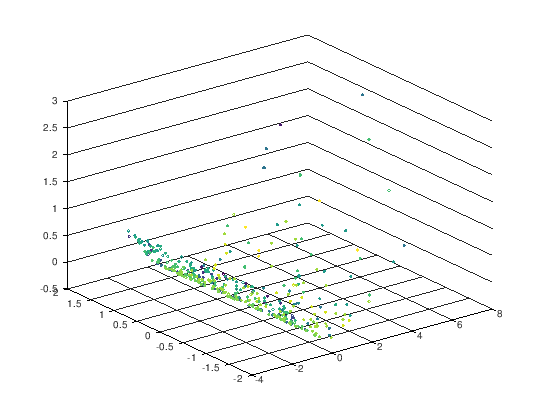

In [18]:
PCA = M*U;
scatter3(PCA(:,1), PCA(:,2), PCA(:,3), [], PCA(:,4))

## Inspecionando os dados do PCA
<a id='PCACompleto'></a>

In [19]:
PCA(1:5,:)
PCA(396:400,:)

ans =

   6.9951e+00   3.7753e-01   2.6393e+00   3.9968e-15
   6.1565e+00  -1.2573e-01   2.0899e+00   4.4409e-15
   5.6558e+00   1.5756e+00   1.7387e+00   3.5527e-15
   5.3143e+00  -9.2744e-01   1.5526e+00   4.4409e-15
   5.0300e+00   1.6179e+00   1.3361e+00   3.9968e-15

ans =

  -2.1238e+00  -1.1832e+00   6.2200e-01   4.3299e-15
  -2.1341e+00  -5.6831e-01   6.1700e-01   3.4417e-15
  -2.1403e+00  -9.9337e-01   6.2911e-01   4.2188e-15
  -2.1479e+00  -1.0548e+00   6.3524e-01   3.5527e-15
  -2.1661e+00   1.4828e+00   5.9867e-01   4.2188e-15



## Restaurando os dados originais
1. Se $M$ é a matriz original
- E $PCA = M\times U$
- E $U$ é a matriz unitária tal que $U\times U^{T} = U^{T}\times U = I$
- Então, utilizando $(2)$ e $(3)$ temos $PCA \times U^{T} = M \times U \times U^{T} = M \times I = M$

Abaixo calculamos $Mr = PCA \times U^{T}$ e geramos o gráfico da matriz resultante. Veja que praticamente não há diferença em relação ao gráfico da [matriz normalizada](#grafNorm)

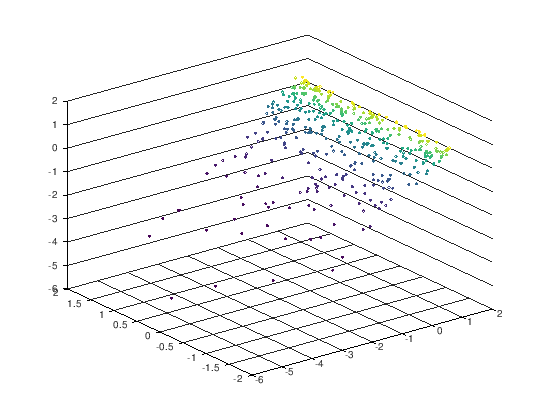

In [20]:
Mr = PCA*U';
scatter3(Mr(:,2), Mr(:,3), Mr(:,4), [], Mr(:,1))

## Como a precisão dos cálculos é limitada, temos um pequeno erro depois da reconstrução de dimensões

In [21]:
mean(abs(M-Mr))

ans =

   3.2282e-16   1.7941e-16   1.2527e-15   2.8136e-16



## Usando PCA para reduzir dimensões
* $PCAr = M \times U_{k}$ onde $U_{k}$ são as primeiras $k$ colunas de $U$

No exemplo abaixo, vamos reduzir os dados originais de $4\rightarrow 2$ dimensões. Como $M$ é $400x4$, e $U_{2}$ é $4x2$, a matriz resultante é $400x2$

In [22]:
PCAr=M*U(:,1:2);
size(PCAr)

ans =

   400     2



# Inspecionando as primeiras cinco linhas e últimas cinco linhas de PCAr

Compare as duas colunas com o resultado obtido [anteriormente](#PCACompleto)

In [23]:
PCAr(1:5,:)
PCAr(396:400,:)

ans =

   6.99511   0.37753
   6.15650  -0.12573
   5.65583   1.57555
   5.31427  -0.92744
   5.03001   1.61790

ans =

  -2.12376  -1.18318
  -2.13414  -0.56831
  -2.14029  -0.99337
  -2.14791  -1.05485
  -2.16608   1.48279



## *Recuperando* os dados
É possível transformar os dados de volta de 2 dimensões para 4 dimensões, mas o processo é "destrutivo" já que a informação sobre duas dimensões foram perdidas na primeira transformação.
* $M$ é nossa matriz original
* $PCA = M\times U_k \rightarrow M_k = PCA \times U^{T}_k = M\times U_k \times U^{T}_k$

Perceba que agora há diferenças entre a matriz reconstruída e a matriz normalizada [original](#grafNorm)

In [24]:
Mk = PCAr*U(:,1:2)';

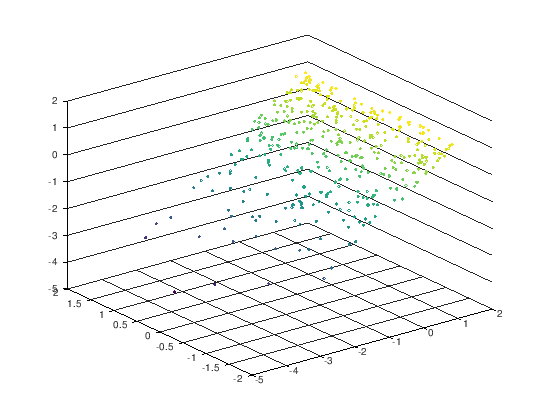

In [25]:
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))

## E o erro (a diferença entre a matriz reconstruída e matriz original), não é mais irrelevante

In [26]:
mean(abs(M-Mk))

ans =

   0.2565084   0.1225463   0.0050870   0.1225463



## E se transformarmos de $4\rightarrow 3\rightarrow 4$ ?
No nosso exemplo, não há um erro significativo se descartarmos apenas uma dimensão e depois restaurarmos a matriz.
* Por quê?
  * Dicas
    * Veja a matriz $S$ (da decomposição SVD)
    * Veja como construímos a matriz $M$ original
    * Veja os gráficos de dispersão $1x1$
    * Veja a matriz de covariância (em especial, os valores fora da diagonal principal)

ans =

   400     3

ans =

   3.2752e-16   3.0798e-15   1.2513e-15   3.0870e-15



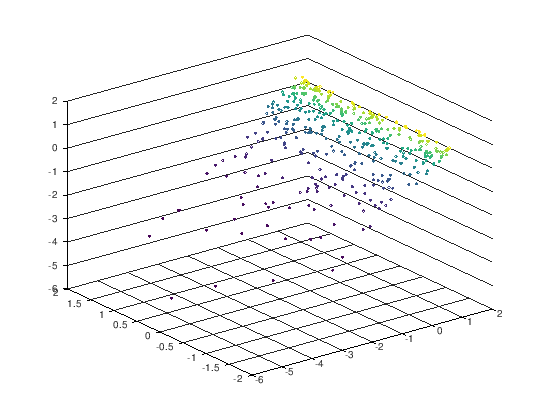

In [27]:
PCAr=M*U(:,1:3);
size(PCAr)
Mk = PCAr*U(:,1:3)';
mean(abs(M-Mk))
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))

## Para encerrar, o que aconteceria se descartarmos 3 dimensões e depois restaurarmos a matriz $M$?

ans =

   400     1

ans =

   0.25675   0.12280   0.86659   0.12280



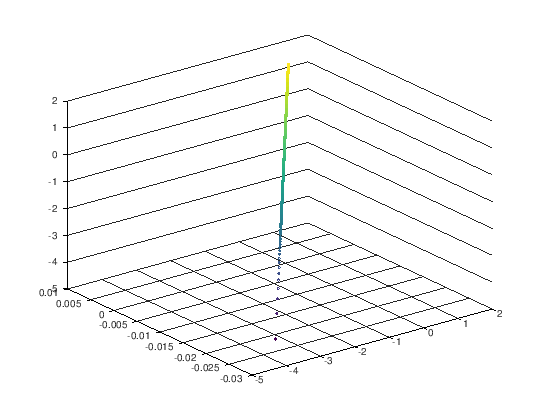

In [28]:
PCAr=M*U(:,1);
size(PCAr)
Mk = PCAr*U(:,1)';
mean(abs(M-Mk))
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))

# O resultado é uma linha!

In [29]:
Mk(1:5,:)
Mk(396:400,:)

ans =

  -3.916468  -4.098297  -0.028424  -4.098297
  -3.446943  -3.606973  -0.025016  -3.606973
  -3.166622  -3.313638  -0.022982  -3.313638
  -2.975386  -3.113524  -0.021594  -3.113524
  -2.816234  -2.946983  -0.020439  -2.946983

ans =

   1.1890653   1.2442697   0.0086296   1.2442697
   1.1948782   1.2503525   0.0086718   1.2503525
   1.1983206   1.2539547   0.0086968   1.2539547
   1.2025860   1.2584181   0.0087277   1.2584181
   1.2127610   1.2690656   0.0088016   1.2690656

